<a href="https://colab.research.google.com/github/ArvindDs/Projects/blob/main/Time_series_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


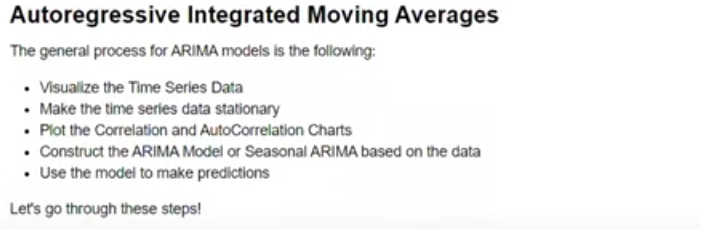

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Perrin Freres monthly champagne sales millions.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
# cleaning up the data
df.columns = ['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
# drop last two rows
df.drop(106, axis=0, inplace=True)

In [ ]:
df.drop(105, axis=0, inplace=True)

In [ ]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
# convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


**Step 2 : Visualise the Data**

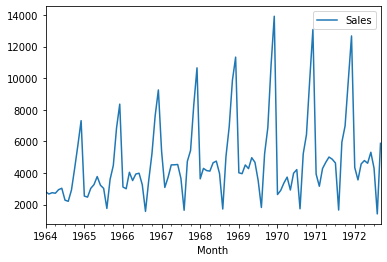

In [ ]:
df.plot()

## ***The***  above plot shows that the data are seasonal i.e there is a repetition of trough and peak within a lag of 12 months. Therefore if the data are seasonal take he shift not for  1 row but of whole cycle of 12 months. see **below**

In [ ]:
#### Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.shape

(105, 5)

In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
# Ho:  It is  non sationary
#H1 : It is  stationary
def adfuller_test(sales):
 result=adfuller(sales) 
 labels= ['ADF Test Statistics','p value','#Lags used', 'Number of observations used']
 for value,label in zip (result,labels):
  print(label+':'+str(value))
 if  result[1] <= 0.05:
     print('strong evidence agaist the null hypothesis, reject the null hypothesis')
 else:
     print('weak evidence agaist the null hypothesis,timeseries has unit root, indicating it  is non stationary' )



In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistics:-1.8335930563276226
p value:0.3639157716602452
#Lags used:11
Number of observations used:93
weak evidence agaist the null hypothesis,timeseries has unit root, indicating it  is non stationary


## **Differencing**

In [ ]:
df['Sales first difference']= df['Sales']- df['Sales'].shift(1)


In [ ]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head(14)

,Sales,Sales first difference,Seasonal first difference,forecast,Seasonal First Difference
Month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN
1964-06-01,3036.0,90.0,NaN,NaN,NaN
1964-07-01,2282.0,-754.0,NaN,NaN,NaN
1964-08-01,2212.0,-70.0,NaN,NaN,NaN
1964-09-01,2922.0,710.0,NaN,NaN,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

NameError: ignored

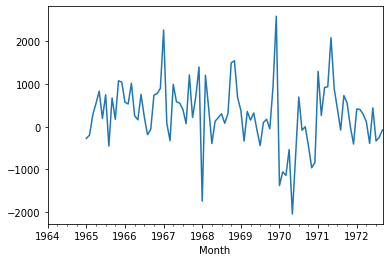

In [ ]:
df['Seasonal first difference'].plot()

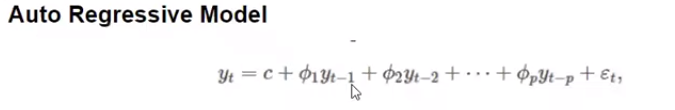

ERROR: Could not find a version that satisfies the requirement pandas.plotting (from versions: none)
ERROR: No matching distribution found for pandas.plotting


<function matplotlib.pyplot.show>

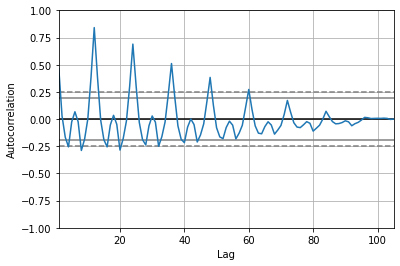

In [ ]:
!pip install pandas.plotting 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show

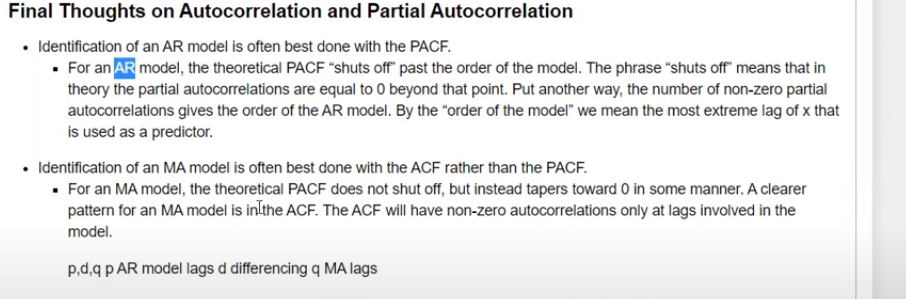

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

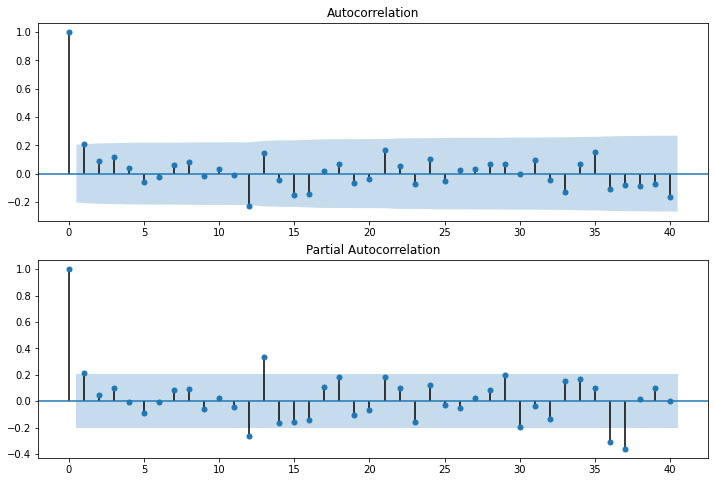

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sun, 30 May 2021   AIC                           1910.251
Time:                        13:01:20   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7837     12.405      1.837      0.069      -1.530      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

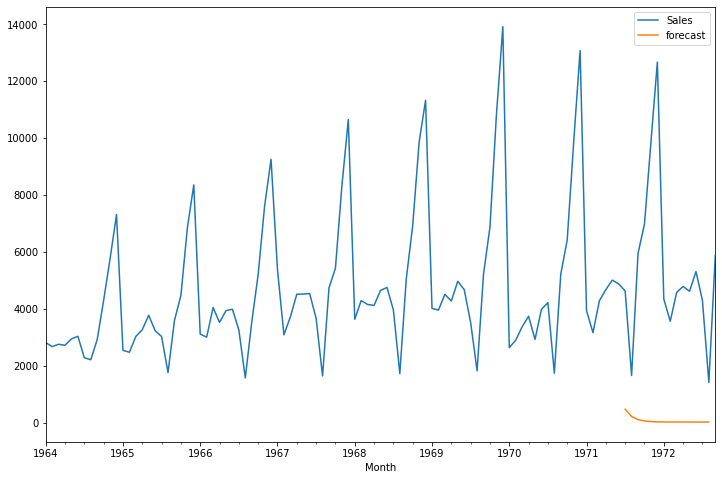

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


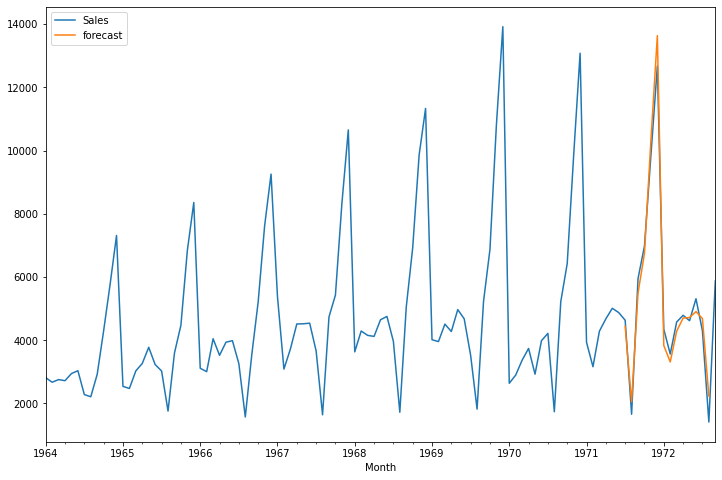

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [ ]:
future_datest_df.tail()


,Sales,Sales first difference,Seasonal first difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

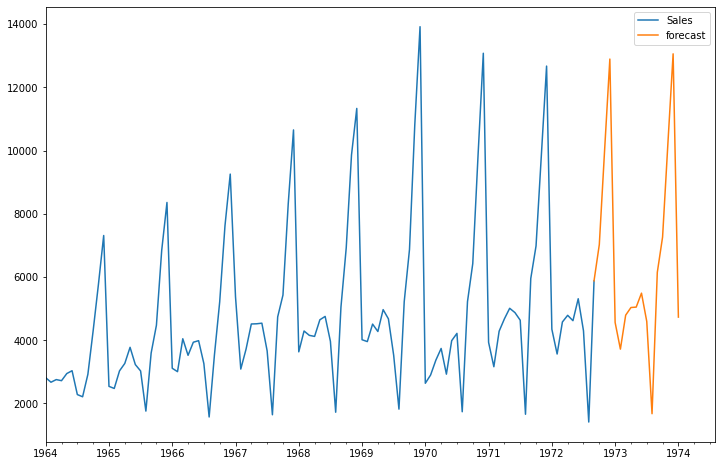

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))